In [1]:
%reload_ext autoreload
%autoreload 2

import navsim_envs
import gym
import matplotlib.pyplot as plt
import numpy as np
from ezai_util.env import env_info
import cv2

navsim_envs: using cv2 as image library
navsim_envs: Adding arora-v0 to Gym registry


In [4]:
env_config = navsim_envs.arora.default_env_config.copy()
env_config["env_path"]="/data/work/unity-envs/Build2.10.13/Berlin_Walk_V2"
env_config["seed"]=123

In [ ]:
# look at all 3 observation modes

for i in [0,1,2]:
    env_config["obs_mode"]=i
    env = gym.make("arora-v0", env_config=env_config) # navsim_envs.env.AroraGymEnv(env_config)
    env_info(env)
    env.close()
    del env

[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment from /data/work/unity-envs/Build2.10.13/Berlin_Walk_V2 at port 5004 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0
[[[  0 165 255]
  [  0 165 255]
  [  0 165 255]
  ...
  [  0 165 255]
  [  0 165 255]
  [  0 165 255]]

 [[  0 165 255]
  [  0 165 255]
  [  0 165 255]
  ...
  [  0 165 255]
  [  0 165 255]
  [  0 165 255]]

 [[  0 165 255]
  [  0 165 255]
  [  0 165 255]
  ...
  [  0 165 255]
  [  0 165 255]
  [  0 165 255]]

 ...

 [[  0 165 255]
  [  0 165 255]
  [  0 165 255]
  ...
  [  0 165 255]
  [  0 165 255]
  [  0 165 255]]

 [[  0 165 255]
  [  0 165 255]
  [  0 165 255]
  ...
  [  0 165 255]
  [  0 165 255]
  [  0 165 255]]

 [[  0 165 255]
  [  0 165 255]
  [  0 165 255]
  ...
  [  0 165 255]
  [  0 165 255]
  [  0 165 255]]]


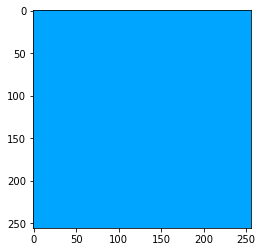

In [9]:
env_config["obs_mode"]=2
env_config['obs_height']=256
env_config['obs_width']=256
env = gym.make("arora-v0", env_config=env_config)
o = env.reset()
env.close()

img = cv2.normalize(o[0], None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
img = img.astype(np.uint8)

plt.imshow(img)
print(img)
#plt.show()
#plt.pause(0.001)
#plt.clf()

In [ ]:
import math
def angle_formula(loc1,loc2):
    return math.atan2(loc2[0] - loc1[0], loc2[2] - loc1[2]) / math.pi * 180

def pr(a,loc1,loc2):
    print(f'{a}:{loc1}-->{loc2},angle:{angle_formula(loc1,loc2)}')

env_config["obs_mode"]=2
env_config['seed']=2
env_config['obs_height']=256
env_config['obs_width']=256
env_config['show_visual']=True
env = gym.make("arora-v0", env_config=env_config) 
env.reset()
pos1 = env.agent_position
rot1 = env.agent_rotation
print(f"Episode 1 {env.agent_position},{env.agent_rotation}")
# starting position
last_loc = env.agent_position
# move left
a = [0,1,0]
env.step(a)
pr(a,last_loc,env.agent_position)
last_loc = env.agent_position

# move forward 2 times
a = [1.0, 0.0, 0.0]
for _ in range(5):
    env.step(a)
    pr(a,last_loc,env.agent_position)
#    #print(math.atan2(o[-1][0] - last_loc[0], o[-1][2] - last_loc[2]) / math.pi * 180)
    last_loc = env.agent_position

# move right
a = [0,-1,0]
env.step(a)
pr(a,last_loc,env.agent_position)
last_loc = env.agent_position

# move forward 2 times
a = [1.0, 0.0, 0.0]
for _ in range(5):
    env.step(a)
    pr(a,last_loc,env.agent_position)
#    #print(math.atan2(o[-1][0] - last_loc[0], o[-1][2] - last_loc[2]) / math.pi * 180)
    last_loc = env.agent_position
    
print('Completed one trajectory')

env.reset()
#print(env.set_agent_state(position=pos1,rotation=rot1))
print(f"Episode 2 {env.agent_position},{env.agent_rotation}")
# starting position
last_loc = env.agent_position
# move forward 20 times
a = [1.0, 0.0, 0.0]
for _ in range(20):
    o,_,_,_ = env.step(a)
    print(angle_formula(last_loc,env.agent_position))
    #print(env.agent_position)
    #print(math.atan2(o[-1][0] - last_loc[0], o[-1][2] - last_loc[2]) / math.pi * 180)
    last_loc = env.agent_position

env.close()
del env

In [ ]:
print(img.min(),img.max())

In [ ]:
img2 = (pow(img, 1/2.2)*255).astype('uint8')

In [ ]:
print(img2.min(),img2.max())

In [ ]:
import ezai_util

In [ ]:
print(ezai_util.image.isbright(img2,thresh=0.3))

In [ ]:
plt.imshow(img2)

In [ ]:
def increase_brightness(image, value=0.1):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # h, s, v = cv2.split(hsv)
    # lim = 255 - value
    # v[v > lim] = 255
    # v[v <= lim] += value
    # final_hsv = cv2.merge((h, s, v))

    hsv[:,:,2] = cv2.add(hsv[:, :, 2], value )
    image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return image

In [ ]:
plt.imshow(increase_brightness(img, value = 0.3))
print(increase_brightness(img, value = 0.3).max())

In [ ]:
navsim_util.image.cv2_util.isbright(img)

In [ ]:
# test for ten steps forward and ten steps back 

env_config["obs_mode"]=2
env = gym.make("navsim-v0", env_config=env_config)

print(env.reset()[-1])
#action_sample = env.action_space.sample()
print("Forward:")
for i in range(0,10):
    action_sample = [1,0,0]
    print(env.step(action_sample)[0][-1])
print("Backward:")
for i in range(0,10):
    action_sample = [-1,0,0]
    print(env.step(action_sample)[0][-1])
#action_sample = env.action_space.sample()
#action_sample = [-1,0,0]
#print(action_sample)
#s2 = env.step(action_sample)
env.close()
del env

In [ ]:
env_config["obs_mode"]=0
env = gym.make("navsim-v0", env_config=env_config)

pos0=env.reset()[-1][0:3]
pos1=env.step([1,0,0])[0][-1][0:3]
pos2=env.step([-1,0,0])[0][-1][0:3]
print(np.linalg.norm(pos1-pos0) - np.linalg.norm(pos2-pos1))

env.close()
del env

In [17]:
env_config["obs_mode"]=2
#env_config['base_port']=5005
env = gym.make("arora-v0", env_config=env_config) 

[INFO] Connected to Unity environment with package version 2.1.0-exp.1 and communication version 1.5.0
[INFO] Created UnityEnvironment from /data/work/unity-envs/Build2.10.11/Berlin_Walk_V2 at port 5004 to start from episode 1
[INFO] Connected new brain: VectorNavigator?team=0


In [18]:
env.reset()
print(env.agent_position)

[684.0, 34.653484, 277.59998]


In [19]:
navigable_map = env.get_navigable_map()

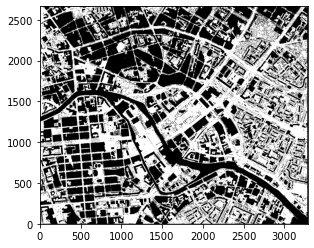

In [20]:
plt.imshow(navigable_map,origin='lower',cmap='gray', vmin=0, vmax=1)

In [21]:
x,y,z = env.agent_position
x=int(x)
z=int(z)
print(x,z)
#x,z
#arr[row,col]
#arr[z,x]

684 277


In [22]:
print(env.get_navigable_map_zoom(x,z))

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [23]:
print(env.get_navigable_map_zoom(z,x))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(navigable_map[z-5:z+5,x-5:x+5])

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 0 0 0 1]
 [1 1 1 1 1 1 0 0 0 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


In [14]:
navigable_point = env.sample_navigable_point()
print(navigable_point)
navigable_point = env.unity_to_navmap_location(navigable_point[0],navigable_point[2])
print(navigable_point)
navigable_map_zoom = env.get_navigable_map_zoom(*navigable_point)
env.close(),
del env

[1823.5657958984375, 34.69333267211914, 78.6468734741211]
(1823, 78)


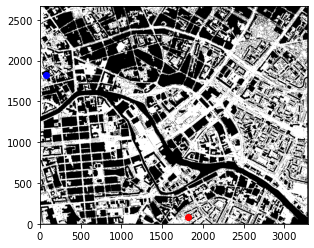

In [15]:
plt.imshow(navigable_map,origin='lower',cmap='gray', vmin=0, vmax=1)
plt.plot(navigable_point[1],navigable_point[0],'bo') #wrong dot
plt.plot(navigable_point[0],navigable_point[1],'ro')

In [ ]:
print(navigable_map_zoom)

In [ ]:
plt.imshow(navigable_map_zoom,origin='lower',cmap='gray', vmin=0, vmax=1)

In [ ]:
# test for seeds for reset() and action samples

num_episodes=10
num_steps=10
num_actions = 3
seeds = [123,321]

reset_obs=np.full((2,2,num_episodes,16),0.0)
actions=np.full((2,2,num_episodes,num_steps,3),0.0)

for i in range(len(seeds)):
    env_config["seed"]=seeds[i]
    for j in range(2):
        env = gym.make("navsim-v0", env_config=env_config) 
        for e in range(num_episodes):
            reset_obs[i,j,e,:] = env.reset()[-1]
            for s in range(num_steps):
                #for k in range(0,num_actions)
                actions[i,j,e,s,:]=env.action_space.sample()
        env.close()
        del env
#    print(reset_obs)
#    print(actions)
#TODO: add the compare logic

In [ ]:
# test for fast_forward

num_episodes=20
env_config["seed"]=794

reset_obs=np.full((2,num_episodes,16),0.0)
env_config["debug"]=True


# no fast_forward 10
env_config["start_from_episode"]=1
env_config["log_folder"]="./env_log_1"
env = gym.make("navsim-v0", env_config=env_config) 
for e in range(num_episodes):
    reset_obs[0,e,:] = env.reset()[-1]
env.close()
del env

# no fast forward 5
env_config["start_from_episode"]=1
env_config["log_folder"]="./env_log_2"
env = gym.make("navsim-v0", env_config=env_config) 
for e in range(10):
    reset_obs[1,e,:] = env.reset()[-1]
env.close()
del env
# fast forward 5
env_config["start_from_episode"]=11
env_config["log_folder"]="./env_log_3"

env = gym.make("navsim-v0", env_config=env_config) 
for e in range(10,num_episodes):
    reset_obs[1,e,:] = env.reset()[-1]
env.close()
del env



#    print(reset_obs)
#    print(actions)
#TODO: add the compare logic

In [ ]:
print(reset_obs[0]-reset_obs[1])